In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
AZUKI_AMBUSH_CONTRACT = "0x71534ecf6dfc97f8cc740717fd67f2efaa00c04b"

# COMBINATIONS OF BIDS & THEIR PRICES

## 1 ITEM
GOLD_PENDENT_PRICE = 1
SILVER_PENDENT_PRICE = 0.35
HOODIE_PRICE = 0.55

## 2 ITEMS
TWO_HOODIES = round(HOODIE_PRICE * 2, 3)
TWO_PENDENTS = round(SILVER_PENDENT_PRICE + GOLD_PENDENT_PRICE, 3)
HOODIE_GOLD_PENDENT = round(HOODIE_PRICE + GOLD_PENDENT_PRICE, 3)
HOODIE_SILVER_PENDENT = round(HOODIE_PRICE + SILVER_PENDENT_PRICE, 3)

## 3 ITEMS 
TWO_HOODIES_GOLD_PENDENT = round(TWO_HOODIES + GOLD_PENDENT_PRICE, 3)
TWO_HOODIES_SILVER_PENDENT = round(TWO_HOODIES + SILVER_PENDENT_PRICE, 3)
HOODIE_GOLD_SILVER_PENDENTS = round(TWO_PENDENTS + HOODIE_PRICE, 3)

## 4 ITEMS
ALL_ITEMS = round(TWO_HOODIES + TWO_PENDENTS, 3)

In [3]:
# array of items count: [HOODIES, SILVER PENDENT, GOLD PENDENT]

ALL_COMB_DICT_UNCLEAN = {
    "GOLD_PENDENT_PRICE": ( GOLD_PENDENT_PRICE, [0,0,1] ),
    "SILVER_PENDENT_PRICE": ( SILVER_PENDENT_PRICE, [0,1,0] ),
    "HOODIE_PRICE": ( HOODIE_PRICE, [1,0,0] ),
    "TWO_HOODIES": ( TWO_HOODIES, [2,0,0] ),
    "TWO_PENDENTS": ( TWO_PENDENTS, [0,1,1] ),
    "HOODIE_GOLD_PENDENT": ( HOODIE_GOLD_PENDENT, [1,0,1] ),
    "HOODIE_SILVER_PENDENT": ( HOODIE_SILVER_PENDENT, [1,1,0] ),
    "TWO_HOODIES_GOLD_PENDENT": ( TWO_HOODIES_GOLD_PENDENT, [2,0,1] ),
    "TWO_HOODIES_SILVER_PENDENT": ( TWO_HOODIES_SILVER_PENDENT, [2,1,1] ),
    "HOODIE_GOLD_SILVER_PENDENTS": ( HOODIE_GOLD_SILVER_PENDENTS, [2,1,0] ),
    "ALL_ITEMS": ( ALL_ITEMS, [2,1,1] )
}



In [4]:
ALL_COMB_DICT_CLEAN = {k:( v[0], v[1]) for k, v in ALL_COMB_DICT_UNCLEAN.items()}
REF_DICT = {v[0]: (k, v[1]) for k, v in ALL_COMB_DICT_CLEAN.items()}

In [5]:
REF_DICT

{1: ('GOLD_PENDENT_PRICE', [0, 0, 1]),
 0.35: ('SILVER_PENDENT_PRICE', [0, 1, 0]),
 0.55: ('HOODIE_PRICE', [1, 0, 0]),
 1.1: ('TWO_HOODIES', [2, 0, 0]),
 1.35: ('TWO_PENDENTS', [0, 1, 1]),
 1.55: ('HOODIE_GOLD_PENDENT', [1, 0, 1]),
 0.9: ('HOODIE_SILVER_PENDENT', [1, 1, 0]),
 2.1: ('TWO_HOODIES_GOLD_PENDENT', [2, 0, 1]),
 1.45: ('TWO_HOODIES_SILVER_PENDENT', [2, 1, 1]),
 1.9: ('HOODIE_GOLD_SILVER_PENDENTS', [2, 1, 0]),
 2.45: ('ALL_ITEMS', [2, 1, 1])}

In [6]:
## DATA TAKEN 5:05PM SINGAPORE TIME OFF AZUKI AMBUSH CONTRACT
df = pd.read_csv("export_azuki_ambush.csv", index_col=False)

In [7]:
deposits_df = df[ df["Value_IN(ETH)"] > 0.0 ]
deposits_df["hoodies_count"] = 0
deposits_df["silver_pendent_count"] = 0
deposits_df["gold_pendent_count"] = 0

In [8]:
def get_bid_counts(row):
    value_transferred = row["Value_IN(ETH)"]
    bid_counts_arr = REF_DICT[value_transferred][1]
    row["hoodies_count"] = bid_counts_arr[0]
    row["silver_pendent_count"] = bid_counts_arr[1]
    row["gold_pendent_count"] = bid_counts_arr[2]

    return row

In [9]:
final_df = deposits_df.apply(get_bid_counts, axis=1)

In [10]:
print(f"Hoodies: {final_df.hoodies_count.sum()} bids [for 1000 pieces], odds: {round(1000/final_df.hoodies_count.sum()*100, 2)}%")
print(f"Silver pendent: {final_df.silver_pendent_count.sum()} bids [for 500 pieces], odds: {round(500/final_df.silver_pendent_count.sum()*100, 2)}%")
print(f"Gold pendent: {final_df.gold_pendent_count.sum()} bids [for 50 pieces], odds: {round(50/final_df.gold_pendent_count.sum()*100, 2)}%")

Hoodies: 1019 bids [for 1000 pieces], odds: 98.14%
Silver pendent: 798 bids [for 500 pieces], odds: 62.66%
Gold pendent: 658 bids [for 50 pieces], odds: 7.6%


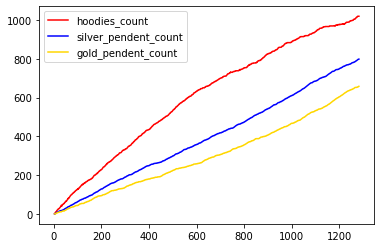

In [11]:
sorted = final_df.sort_values("UnixTimestamp", axis=0)
sorted["hoodies_count"].cumsum().plot(color="red", legend= True)
sorted["silver_pendent_count"].sort_index().cumsum().plot(color = "blue", legend=True)
sorted["gold_pendent_count"].sort_index().cumsum().plot(color = "gold", legend=True)